In [1]:
import numpy as np
import matplotlib
import numpy as np
import scipy.stats as sst
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sns
from math import *
import scipy.spatial.distance as ssp
import pandas as pd


import helpers.theo_variogram_fct as vario
import helpers.th_cov_func as nest_vario
from ipywidgets import interact,Checkbox,Text,VBox

import helpers.kriging as kri
import helpers.variogram as variokri

from IPython.display import Image
from IPython.display import display
from IPython.display import SVG

In [2]:
data = pd.read_csv("data_iquique/data_fe.csv")
xyz = data.to_numpy()
print(xyz[:3])

#reduce coordenate numbers
xyz[:,0]= xyz[:,0] - min(xyz[:,0])
xyz[:,1]= xyz[:,1] - min(xyz[:,1])
print(xyz[:3])

[[7.787318e+06 4.347360e+05 5.970000e+00]
 [7.782211e+06 4.350980e+05 9.450000e+00]
 [7.782877e+06 4.403180e+05 8.040000e+00]]
[[1.09058e+05 5.44060e+04 5.97000e+00]
 [1.03951e+05 5.47680e+04 9.45000e+00]
 [1.04617e+05 5.99880e+04 8.04000e+00]]


(560, 2)


Text(0.5, 1.0, 'Scatter plot of sample location')

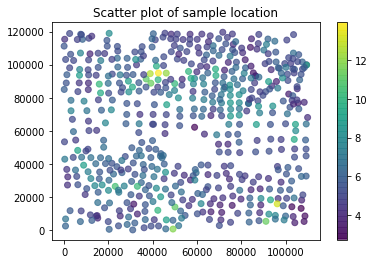

In [3]:
#Scatter plot of samples
xy = xyz[:,0:2]
print(xy.shape)

x = xyz[:,0] #in case of...
y = xyz[:,1]
z = xyz[:,2]

plt.scatter(x,
           y,
           c=z,
           alpha=0.7)
plt.colorbar()
plt.title('Scatter plot of sample location')

155400.20058223864


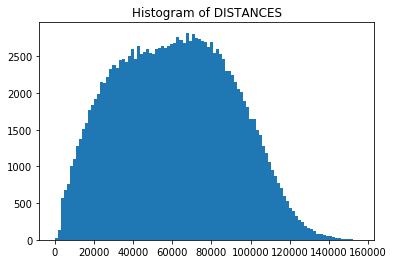

In [4]:
H = ssp.pdist(xy, metric='euclidean')

D = ssp.squareform(H)
plt.hist(H, bins=100)
plt.title("Histogram of DISTANCES")
print(max(H))

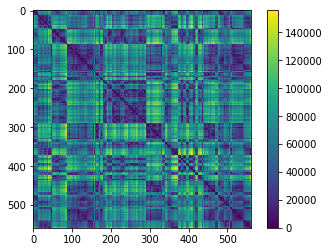

In [5]:
plt.imshow(D)
plt.colorbar()

### Correlogram

In [14]:
n = np.linspace(1000,30000,30)
bins = np.array(n)
print(bins)
print(type(bins))

[ 1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000. 10000.
 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000. 20000.
 21000. 22000. 23000. 24000. 25000. 26000. 27000. 28000. 29000. 30000.]
<class 'numpy.ndarray'>


In [15]:
ixs = []    # for measurement values at point 0
ixs_h = []  # for measurement values at point 1
rs = []     # for rs in each bin
d_mean = [] # for mean distances

ix = np.array(np.where(np.logical_and(D>bins[0], D<=bins[1])))
print(ix.shape)

(2, 50)


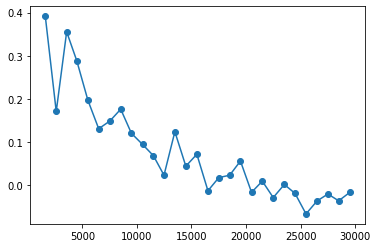

In [16]:
F = z

for cur_i in range(0, len(bins)-1):
    ix = np.where(np.logical_and(D>bins[cur_i], D<=bins[cur_i+1]))
    d_mean.append(D[ix].mean())
    F_0 = F[ix[0]]
    F_1 = F[ix[1]]
    r = np.corrcoef(F_0, F_1)[1,0]
    rs.append(r)
    ixs.append(F_0)
    ixs_h.append(F_1)

#plot
plt.plot(d_mean,
         rs,
        'o-')

### Variogram

In [17]:
Z1, Z2 = np.meshgrid(F, F)
sem_var = (Z1-Z2)**2.
sem_vars = []
co_vars = []
sem_vars_v2 = []
n_pts = []

for cur_i_bin, cur_bin in enumerate(bins[:-1]):
    #print cur_i_bin, cur_bin
    ix = np.where(np.logical_and(D>bins[cur_i_bin], D<=bins[cur_i_bin+1]))
#     print len(ix)
#     print "  ", ix[0].shape, ix[0].min(), ix[0].max()
#     print "  ", ix[1].shape, ix[1].min(), ix[1].max()
    
    ## do it via the prepared large matrices
    sem_var_cur = np.sum(sem_var[ix])/(2.0 * ix[0].shape[0])
    #print sem_var_cur
    sem_vars.append(sem_var_cur)
    
    #print"      ",  ix[0].shape[0]
    sem_var_v2 = np.sum((F[ix[1]] - F[ix[0]])**2)/(2.0 * ix[0].shape[0])
    sem_vars_v2.append(sem_var_v2)
    
    mean = F[ix[1]].mean()
    covar = np.sum((F[ix[1]]-mean)* (F[ix[0]]-mean))/( ix[0].shape[0])
    co_vars.append(covar)

(0.0, 3.0292822901696987)

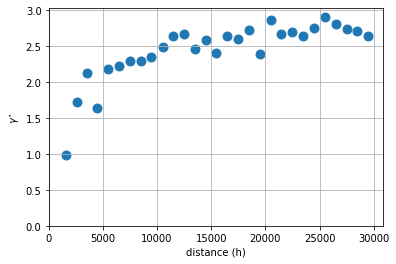

In [18]:
centers =  (bins[:-1] + bins[1:])/2
plt.scatter(d_mean, np.array(sem_vars), s=80)
plt.grid(True)
plt.xlabel('distance (h)')
plt.ylabel('$\gamma^{\star}$')
plt.xlim(0.0,)
plt.ylim(0.0,)

In [11]:
var = np.zeros((len(coord_xy),len(coord_xy)))
for i in range(coord_xy):
    for j in range(i, coord_xy):
        var[i,j] = (data[i] - data[j])**2.

NameError: name 'coord_xy' is not defined

In [12]:
dists_ix = np.triu_indices(D.shape[0], 0)
dists_triu = D[dists_ix]

vars_ix = np.triu_indices(var.shape[0], 0)
vars_triu = var[vars_ix]

plt.scatter(dists_triu, vars_triu, s=40, facecolors='none', edgecolors='b')
plt.xlabel("distance")
plt.ylabel("variance")

NameError: name 'var' is not defined

In [13]:
x = np.linspace(0,490,num=50)
y = np.linspace(0,490,num=50)
xx , yy = np.mesh(x,y)

AttributeError: module 'numpy' has no attribute 'mesh'